In [4]:
import time
import matplotlib.pyplot as plt

Our code for "Target game"

In [13]:
"""Target game"""
import random
def my_generate_grid() -> list[list[str]]:
    """
    Generates list of lists of letters - i.e. grid for the game.
    e.g. [['I', 'G', 'E'], ['P', 'I', 'S'], ['W', 'M', 'G']]
    """
    abc_consonents = "BCDFGHJKLMNPQRSTVWXYZ"
    abc_vowels = "AEIOU"
    lst1 = []
    lst2 = []
    lst3 = []
    for _ in range(6):
        rand_consonent = abc_consonents[random.randint(0, len(abc_consonents) - 1)]
        if len(lst1) != 2:
            lst1.append(rand_consonent)
        elif len(lst2) != 2:
            lst2.append(rand_consonent)
        elif len(lst3) != 2:
            lst3.append(rand_consonent)

    for _ in range(3):
        rand_vowel = abc_vowels[random.randint(0, len(abc_vowels) - 1)]
        if len(lst1) != 3:
            lst1.append(rand_vowel)
        elif len(lst2) != 3:
            lst2.append(rand_vowel)
        elif len(lst3) != 3:
            lst3.append(rand_vowel)

    random.shuffle(lst1)
    random.shuffle(lst2)
    random.shuffle(lst3)

    lst = [lst1, lst2, lst3]
    return lst

def my_get_words(file: str, letters: list[str]) -> list[str]:
    """
    Reads the file f. Checks the words with rules and returns a list of words.
    >>> get_words('en.txt', ['h', 'e', 'l', 'l', 'k', 'r', 'f', 'x', 'p'])
    ['ferk', 'kell', 'kelp', 'kerf', 'perk']
    >>> get_words(123, ['g', 'l'])

    """
    if isinstance(file, str) and isinstance(letters, list):
        with open(file, "r", encoding='utf-8') as file_:
            words = []
            for line in file_:
                line = line[:-1].lower()
                if len(line) >= 4 and letters[4] in line:
                    test = 0
                    for letter in line:
                        if letter not in letters or line.count(letter) > letters.count(letter):
                            test = 1
                            break
                    if test == 1:
                        continue
                    words.append(line)
        return words

def my_get_user_words() -> list[str]:
    """
    Gets words from user input and returns a list with these words.
    Usage: enter a word or press ctrl+d to finish for *nix or Ctrl-Z+Enter 
    for Windows.
    Note: the user presses the enter key after entering each word.
    """
    user_answer = []
    while True:
        try:
            answer = input(">>> ")
            user_answer.append(answer)
        except EOFError:
            break
    return user_answer

def my_get_pure_user_words(user_words: list[str], letters: list[str], \
    words_from_dict: list[str]) -> list[str]:
    """
    Checks user words with the rules and returns list of those words
    that are not in dictionary.
    >>> get_pure_user_words(['ferk', 'kelp', 'plek'], ['h', 'e', 'l', 'l', \
    'k', 'r', 'f', 'x', 'p'], ['ferk', 'kell', 'kelp', 'kerf', 'perk'])
    ['plek']
    >>> get_pure_user_words('lhfa', 'asdfsdf', 'asdf')

    """
    if isinstance(user_words, list) and isinstance(letters, list) and \
        isinstance(words_from_dict, list):
        pure_lst = []
        for element in user_words:
            if len(element) >= 4 and letters[4] in element:
                test = 0
                for i in element:
                    if i not in letters or element.count(i) > letters.count(i):
                        test = 1
                        break
                if test == 1:
                    continue
                if element not in words_from_dict:
                    pure_lst.append(element)
        return pure_lst

def my_main():
    """
    Main function for target game
    """
    lst = my_generate_grid()
    print(f"Your board is {lst}")

    print("Please, suggest your words here:")
    user_words_lst = my_get_user_words()

    new_lst = []
    for item in lst:
        for element in item:
            new_lst.append(element.lower())
    possible_words = my_get_words("en.txt", new_lst)

    right_words = []
    for word in user_words_lst:
        if word in possible_words:
            right_words.append(word)

    print(f"Number of possible words: {len(right_words)}")
    print(f"All posible words: {possible_words}")

    words_from_dict_set = set(possible_words)
    user_words_set = set(user_words_lst)
    wrong_words_ = words_from_dict_set.difference(user_words_set)
    wrong_words_ = list(wrong_words_)

    print(f"You missed the following words: {wrong_words_}")

    pure_words = my_get_pure_user_words(user_words_lst, new_lst, possible_words)
    print(f"You suggest, but we don`t have them in the dictionary: {pure_words}")

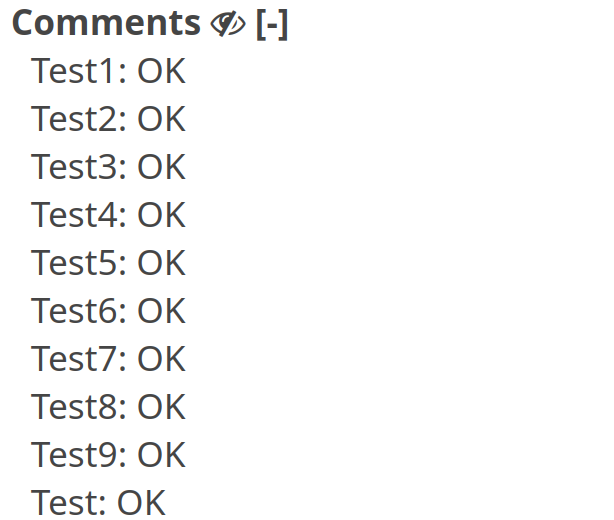

As you can see, all tests are passed.

Request 1: Can you optimize provided code according to the task?

Generated code:

In [14]:
import random

def generate_grid() -> list[list[str]]:
    """
    Generates list of lists of letters - i.e. grid for the game.
    e.g. [['I', 'G', 'E'], ['P', 'I', 'S'], ['W', 'M', 'G']]
    """
    consonants = "BCDFGHJKLMNPQRSTVWXYZ"
    vowels = "AEIOU"
    grid = [random.sample(consonants, 2) + random.sample(vowels, 1) for _ in range(3)]
    return grid

def get_words(file: str, letters: list[str]) -> list[str]:
    """
    Reads the file f. Checks the words with rules and returns a list of words.
    """
    with open(file, "r", encoding='utf-8') as file_:
        dictionary = set(word.strip().lower() for word in file_)
    central_letter = letters[4]
    valid_words = [word for word in dictionary if len(word) >= 4 and central_letter in word]
    possible_words = []
    for word in valid_words:
        word_count = {letter: word.count(letter) for letter in set(word)}
        if all(letters.count(letter) >= count for letter, count in word_count.items()):
            possible_words.append(word)
    return possible_words

def get_user_words() -> list[str]:
    """
    Gets words from user input and returns a list with these words.
    """
    print("Please, suggest your words here (press Ctrl+D to finish):")
    return [word.strip().lower() for word in iter(input, '')]

def main():
    """
    Main function for target game
    """
    grid = generate_grid()
    print(f"Your board is {grid}")

    user_words = get_user_words()
    grid_letters = [letter.lower() for row in grid for letter in row]
    possible_words = get_words("en.txt", grid_letters)

    right_words = set(user_words) & set(possible_words)
    print(f"Number of possible words: {len(right_words)}")
    print(f"All possible words: {possible_words}")

    missed_words = set(possible_words) - set(user_words)
    print(f"You missed the following words: {missed_words}")

    pure_words = [word for word in user_words if word not in possible_words]
    print(f"Words not found in the dictionary: {pure_words}")

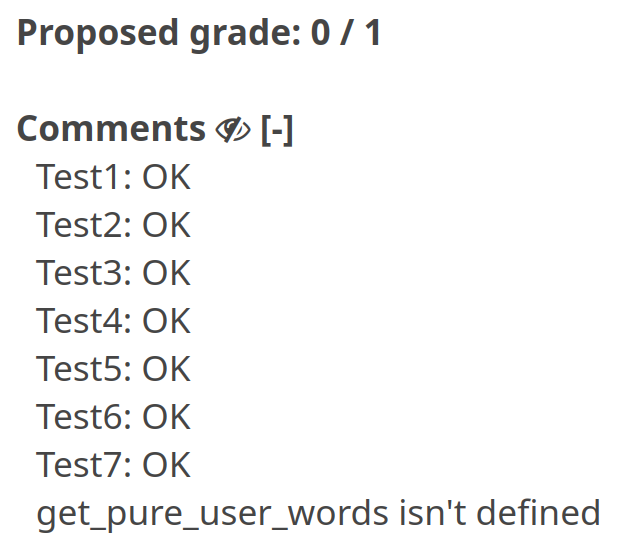

Request 2: get_pure_user_words isn't defined

Generated code:

In [15]:
import random

def generate_grid() -> list[list[str]]:
    """
    Generates list of lists of letters - i.e. grid for the game.
    e.g. [['I', 'G', 'E'], ['P', 'I', 'S'], ['W', 'M', 'G']]
    """
    consonants = "BCDFGHJKLMNPQRSTVWXYZ"
    vowels = "AEIOU"
    grid = [random.sample(consonants, 2) + random.sample(vowels, 1) for _ in range(3)]
    return grid

def get_words(file: str, letters: list[str]) -> list[str]:
    """
    Reads the file f. Checks the words with rules and returns a list of words.
    """
    with open(file, "r", encoding='utf-8') as file_:
        dictionary = set(word.strip().lower() for word in file_)
    central_letter = letters[4]
    valid_words = [word for word in dictionary if len(word) >= 4 and central_letter in word]
    possible_words = []
    for word in valid_words:
        word_count = {letter: word.count(letter) for letter in set(word)}
        if all(letters.count(letter) >= count for letter, count in word_count.items()):
            possible_words.append(word)
    return possible_words

def get_user_words() -> list[str]:
    """
    Gets words from user input and returns a list with these words.
    """
    print("Please, suggest your words here (press Ctrl+D to finish):")
    return [word.strip().lower() for word in iter(input, '')]

def get_pure_user_words(user_words: list[str], letters: list[str], words_from_dict: list[str]) -> list[str]:
    """
    Checks user words with the rules and returns list of those words
    that are not in dictionary.
    """
    pure_words = []
    for word in user_words:
        if len(word) >= 4 and letters[4] in word:
            word_count = {letter: word.count(letter) for letter in set(word)}
            if all(letters.count(letter) >= count for letter, count in word_count.items()) and word not in words_from_dict:
                pure_words.append(word)
    return pure_words

def main():
    """
    Main function for target game
    """
    grid = generate_grid()
    print(f"Your board is {grid}")

    user_words = get_user_words()
    grid_letters = [letter.lower() for row in grid for letter in row]
    possible_words = get_words("en.txt", grid_letters)

    right_words = set(user_words) & set(possible_words)
    print(f"Number of possible words: {len(right_words)}")
    print(f"All possible words: {possible_words}")

    missed_words = set(possible_words) - set(user_words)
    print(f"You missed the following words: {missed_words}")

    pure_words = [word for word in user_words if word not in possible_words]
    print(f"Words not found in the dictionary: {pure_words}")

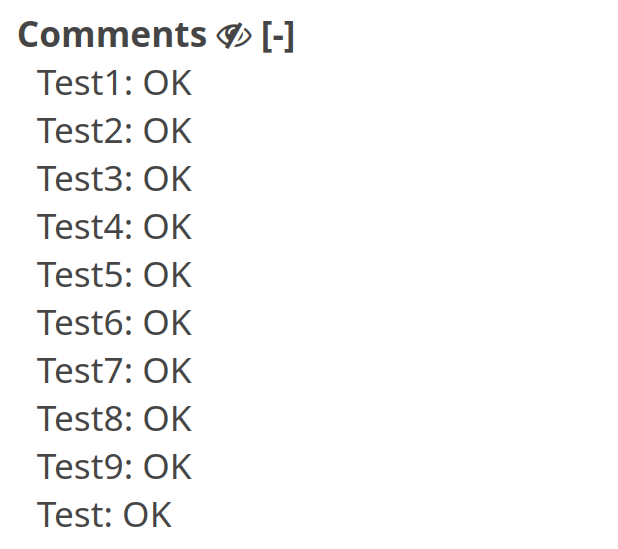

Fuction for measuring time:

In [16]:
def measure_time():
    # Initialize lists to store execution times
    execution_times_chatgpt = []
    execution_times_your_code = []
    execution_times_by_parts = []

    for _ in range(100):
        # Measure time for ChatGPT code
        start_time = time.time()
        generate_grid()
        get_words("en.txt", ['h', 'e', 'l', 'l', 'k', 'r', 'f', 'x', 'p'])
        get_pure_user_words(['ferk', 'kelp', 'plek'], ['h', 'e', 'l', 'l', \
        'k', 'r', 'f', 'x', 'p'], ['ferk', 'kell', 'kelp', 'kerf', 'perk'])
        end_time = time.time()
        execution_time_chatgpt = end_time - start_time
        execution_times_chatgpt.append(execution_time_chatgpt)

        # Measure time for your code
        start_time = time.time()
        my_generate_grid()
        my_get_words("en.txt", ['h', 'e', 'l', 'l', 'k', 'r', 'f', 'x', 'p'])
        my_get_pure_user_words(['ferk', 'kelp', 'plek'], ['h', 'e', 'l', 'l', \
        'k', 'r', 'f', 'x', 'p'], ['ferk', 'kell', 'kelp', 'kerf', 'perk'])
        end_time = time.time()
        execution_time_your_code = end_time - start_time
        execution_times_your_code.append(execution_time_your_code)

    # Plotting the graph
    plt.plot(range(1, 101), execution_times_chatgpt, label='ChatGPT code')
    plt.plot(range(1, 101), execution_times_your_code, label='My code')
    plt.xlabel('Iteration')
    plt.ylabel('Execution Time (seconds)')
    plt.title('Execution Time Comparison')
    plt.legend()
    plt.show()


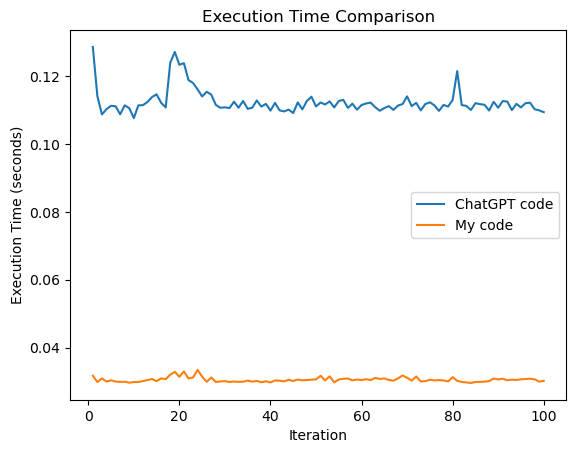

In [17]:
measure_time()

Request 3: Try to reduce execution time

Generated code:

In [19]:
import random

def generate_grid() -> list[list[str]]:
    """
    Generates list of lists of letters - i.e. grid for the game.
    """
    consonants = "BCDFGHJKLMNPQRSTVWXYZ"
    vowels = "AEIOU"
    grid = [random.sample(consonants, 2) + random.sample(vowels, 1) for _ in range(3)]
    return grid

def get_word_count(word: str) -> dict:
    """
    Computes and returns the count of each letter in the word.
    """
    return {letter: word.count(letter) for letter in set(word)}

def get_words(file: str, letters: list[str]) -> list[str]:
    """
    Reads the file f. Checks the words with rules and returns a list of words.
    """
    with open(file, "r", encoding='utf-8') as file_:
        dictionary = set(word.strip().lower() for word in file_)
    central_letter = letters[4]
    possible_words = [word for word in dictionary if len(word) >= 4 and central_letter in word]
    return possible_words

def get_user_words() -> list[str]:
    """
    Gets words from user input and returns a list with these words.
    """
    print("Please, suggest your words here (press Ctrl+D to finish):")
    return [word.strip().lower() for word in iter(input, '')]

def get_pure_user_words(user_words: list[str], letters: list[str], words_from_dict: set[str]) -> list[str]:
    """
    Checks user words with the rules and returns a list of those words
    that are not in the dictionary.
    """
    grid_counts = {letter: letters.count(letter) for letter in set(letters)}
    pure_words = [word for word in user_words if len(word) >= 4 and letters[4] in word and word not in words_from_dict and all(word.count(letter) <= grid_counts.get(letter, 0) for letter in set(word))]
    return pure_words

def main():
    """
    Main function for target game
    """
    grid = generate_grid()
    print(f"Your board is {grid}")

    user_words = get_user_words()
    grid_letters = {letter.lower() for row in grid for letter in row}
    possible_words = get_words("en.txt", grid_letters)

    right_words = set(user_words) & set(possible_words)
    print(f"Number of possible words: {len(right_words)}")
    print(f"All possible words: {possible_words}")

    missed_words = set(possible_words) - set(user_words)
    print(f"You missed the following words: {missed_words}")

    pure_words = [word for word in user_words if word not in possible_words]
    print(f"Words not found in the dictionary: {pure_words}")


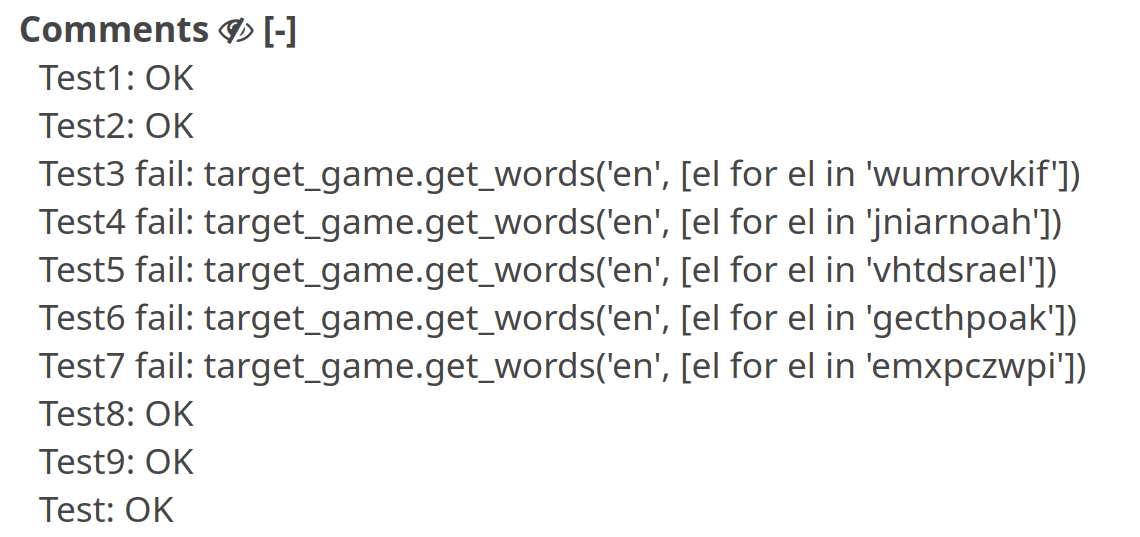

Request 4: Test3 fail: target_game.get_words('en', [el for el in 'wumrovkif'])
           Test4 fail: target_game.get_words('en', [el for el in 'jniarnoah'])
           Test5 fail: target_game.get_words('en', [el for el in 'vhtdsrael'])
           Test6 fail: target_game.get_words('en', [el for el in 'gecthpoak'])
           Test7 fail: target_game.get_words('en', [el for el in 'emxpczwpi'])

Generated code:

In [22]:
import random

def generate_grid() -> list[list[str]]:
    """
    Generates list of lists of letters - i.e. grid for the game.
    """
    consonants = "BCDFGHJKLMNPQRSTVWXYZ"
    vowels = "AEIOU"
    grid = [random.sample(consonants, 2) + random.sample(vowels, 1) for _ in range(3)]
    return grid

def get_word_count(word: str) -> dict:
    """
    Computes and returns the count of each letter in the word.
    """
    return {letter: word.count(letter) for letter in set(word)}

def get_words(file: str, letters: list[str]) -> list[str]:
    """
    Reads the file f. Checks the words with rules and returns a list of words.
    """
    with open(file, "r", encoding='utf-8') as file_:
        dictionary = set(word.strip().lower() for word in file_)
    central_letter = letters[4]
    possible_words = [word for word in dictionary if len(word) >= 4 and central_letter in word and all(word.count(letter) <= letters.count(letter) for letter in set(word))]
    return possible_words


def get_user_words() -> list[str]:
    """
    Gets words from user input and returns a list with these words.
    """
    print("Please, suggest your words here (press Ctrl+D to finish):")
    return [word.strip().lower() for word in iter(input, '')]

def get_pure_user_words(user_words: list[str], letters: list[str], words_from_dict: set[str]) -> list[str]:
    """
    Checks user words with the rules and returns a list of those words
    that are not in the dictionary.
    """
    grid_counts = {letter: letters.count(letter) for letter in set(letters)}
    pure_words = [word for word in user_words if len(word) >= 4 and letters[4] in word and word not in words_from_dict and all(word.count(letter) <= grid_counts.get(letter, 0) for letter in set(word))]
    return pure_words

def main():
    """
    Main function for target game
    """
    grid = generate_grid()
    print(f"Your board is {grid}")

    user_words = get_user_words()
    grid_letters = {letter.lower() for row in grid for letter in row}
    possible_words = get_words("en.txt", grid_letters)

    right_words = set(user_words) & set(possible_words)
    print(f"Number of possible words: {len(right_words)}")
    print(f"All possible words: {possible_words}")

    missed_words = set(possible_words) - set(user_words)
    print(f"You missed the following words: {missed_words}")

    pure_words = [word for word in user_words if word not in possible_words]
    print(f"Words not found in the dictionary: {pure_words}")

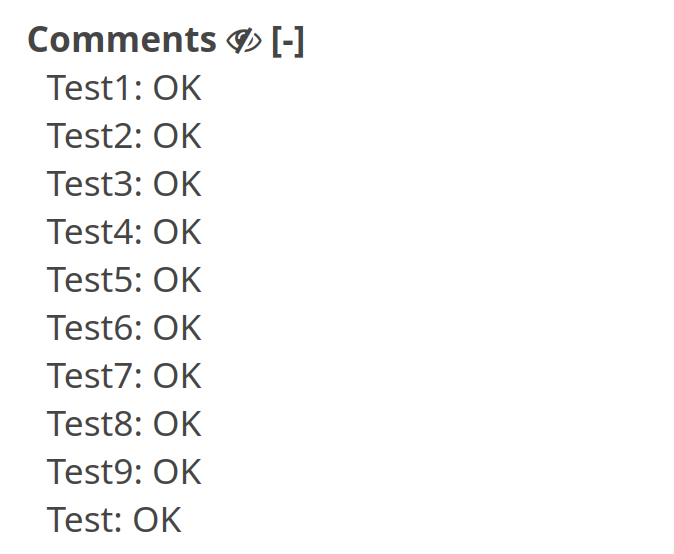

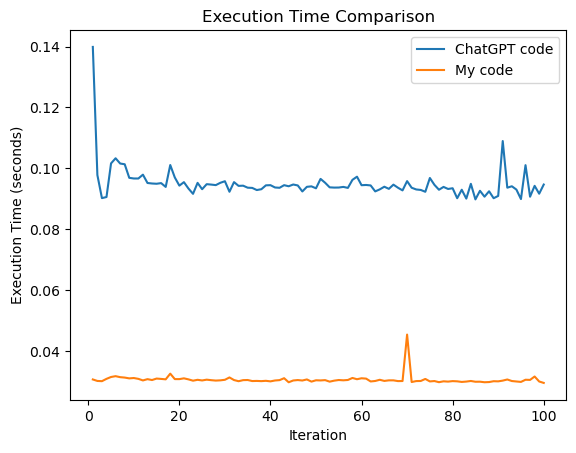

In [23]:
measure_time()